In [4]:
library(dplyr)
library(ggplot2)

In [2]:
############## Load expression data (single-cell)

In [3]:
# Seurat object
mydir = "/share/ScratchGeneral/anncuo/OneK1K/"
sce_filename = paste0(mydir,"cell_type.RDS")

In [4]:
x = c(0:10)
y = x

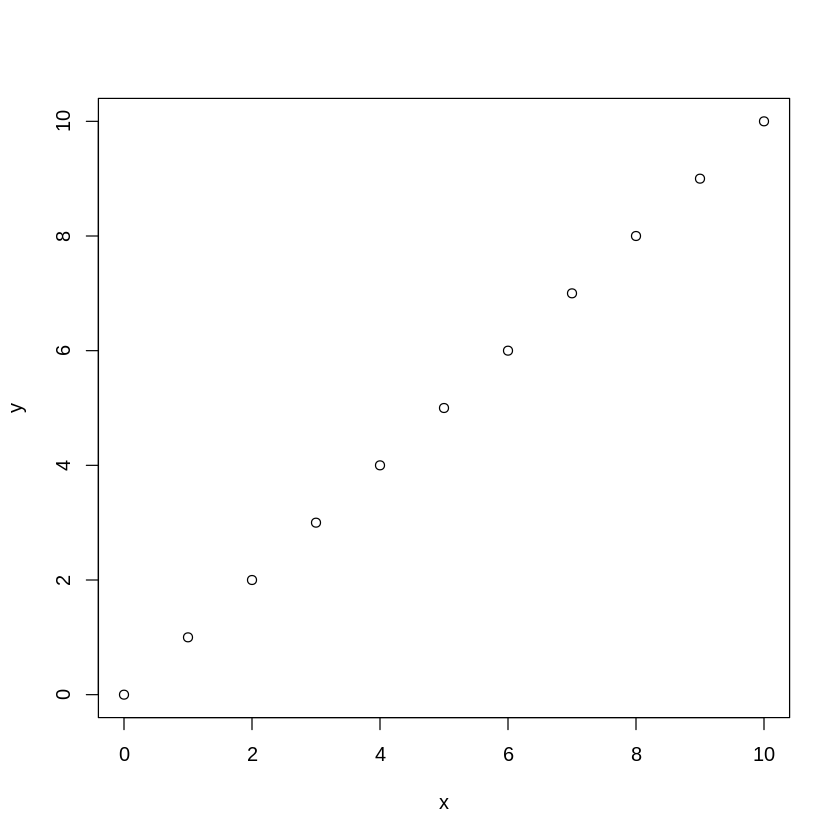

In [5]:
plot(x,y)

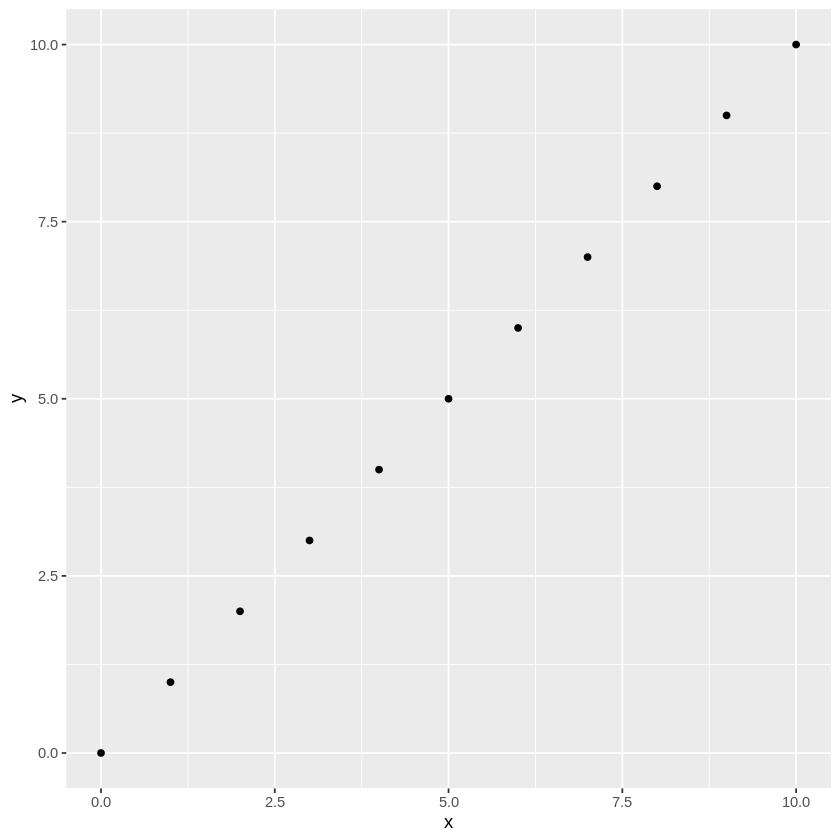

In [6]:
df = data.frame(x=x,y=y)
ggplot(df, aes(x=x,y=y)) + geom_point()

In [5]:
sce = readRDS(sce_filename)
sce

Loading required package: Seurat

Attaching SeuratObject



An object of class Seurat 
57641 features across 1272489 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [6]:
######## make input files
input_files_dir = paste0(mydir,"input_files_CellRegMap/")

In [7]:
####### make sample mapping file (smf)

In [8]:
## Metadata
metadata_filename =  paste0(mydir,"/metadata.RDS")
df = readRDS(metadata_filename)

In [9]:
### B cell only SMF
B_cell_types = unique(as.character(df$cell_type))[grep("B cell", unique(as.character(df$cell_type)))]
B_cell_types

[1] "TCL1A+ FCER2+ B cell" "TCL1A- FCER2- B cell" "IgJ+ B cell"

In [10]:
df_B = df[df$cell_type %in% B_cell_types,]
nrow(df_B)
head(df_B,2)

[1] 133716

,orig.ident,nCount_RNA,nFeature_RNA,pool,individual,percent.mt,latent,nCount_SCT,nFeature_SCT,cell_type,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<fct>,<dbl>,<int>,<fct>,<dbl>,<chr>,<dbl>,<chr>
AAACCTGCAACGATCT-1,onek1k,3847,884,pool_1,686_687,3.717182,b1,3756,883,TCL1A+ FCER2+ B cell,1,B,0.8730781,B naive
AAACCTGGTCAGAATA-1,onek1k,4028,1097,pool_1,692_693,3.202582,b1,3811,1095,TCL1A- FCER2- B cell,1,B,0.9379463,B intermediate


In [11]:
# retain only second part of individual ID (samples sequenced twice)
smf_df = data.frame(phenotype_sample_id = rownames(df_B), 
                    genotype_individual_id = gsub(".*_","",df_B$individual),
                   individual_long = df_B$individual)
head(smf_df)

,phenotype_sample_id,genotype_individual_id,individual_long
,<chr>,<chr>,<chr>
1,AAACCTGCAACGATCT-1,687,686_687
2,AAACCTGGTCAGAATA-1,693,692_693
3,AAACGGGAGCGTCAAG-1,693,692_693
4,AAACGGGAGGGAACGG-1,691,690_691
5,AAACGGGCAGTTCATG-1,683,682_683
6,AAACGGGGTCCCTACT-1,693,692_693


In [12]:
smf_filename = paste0(input_files_dir,"smf_Bcells.csv")
smf_filename

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/smf_Bcells.csv"

In [13]:
# write.csv(smf_df, smf_filename)

In [19]:
B_cells_no_plasma = B_cell_types[grep("TCL1A", B_cell_types)]
B_cells_no_plasma

[1] "TCL1A+ FCER2+ B cell" "TCL1A- FCER2- B cell"

In [20]:
df_B_np = df[df$cell_type %in% B_cells_no_plasma,]
nrow(df_B_np)
head(df_B_np,2)

[1] 130091

,orig.ident,nCount_RNA,nFeature_RNA,pool,individual,percent.mt,latent,nCount_SCT,nFeature_SCT,cell_type,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<fct>,<dbl>,<int>,<fct>,<dbl>,<chr>,<dbl>,<chr>
AAACCTGCAACGATCT-1,onek1k,3847,884,pool_1,686_687,3.717182,b1,3756,883,TCL1A+ FCER2+ B cell,1,B,0.8730781,B naive
AAACCTGGTCAGAATA-1,onek1k,4028,1097,pool_1,692_693,3.202582,b1,3811,1095,TCL1A- FCER2- B cell,1,B,0.9379463,B intermediate


In [21]:
# retain only second part of individual ID (samples sequenced twice)
smf_df = data.frame(phenotype_sample_id = rownames(df_B_np), 
                    genotype_individual_id = gsub(".*_","",df_B_np$individual),
                   individual_long = df_B_np$individual)
head(smf_df)

,phenotype_sample_id,genotype_individual_id,individual_long
,<chr>,<chr>,<chr>
1,AAACCTGCAACGATCT-1,687,686_687
2,AAACCTGGTCAGAATA-1,693,692_693
3,AAACGGGAGCGTCAAG-1,693,692_693
4,AAACGGGAGGGAACGG-1,691,690_691
5,AAACGGGCAGTTCATG-1,683,682_683
6,AAACGGGGTCCCTACT-1,693,692_693


In [22]:
smf_filename = paste0(input_files_dir,"smf_Bcells_noplasma.csv")
smf_filename

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/smf_Bcells_noplasma.csv"

In [23]:
write.csv(smf_df, smf_filename)

In [16]:
##################################################
##### cell contexts (B-cells only)

In [24]:
# B_cells = colnames(sce)[colnames(sce) %in% rownames(df_B)]
B_cells = colnames(sce)[colnames(sce) %in% rownames(df_B_np)]
length(B_cells)
head(B_cells)

[1] 130091

[1] "AAACCTGCAACGATCT-1" "AAACCTGGTCAGAATA-1" "AAACGGGAGCGTCAAG-1"
[4] "AAACGGGAGGGAACGG-1" "AAACGGGCAGTTCATG-1" "AAACGGGGTCCCTACT-1"

In [25]:
sce_B = sce[,colnames(sce) %in% B_cells]
sce_B

An object of class Seurat 
57641 features across 130091 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [26]:
# this would probably be faster in python / hail
sce_B = RunPCA(sce_B)

PC_ 1 
Positive:  GNLY, S100A9, S100A8, NKG7, LYZ, CCL5, S100A4, TYROBP, B2M, KLRB1 
	   IL32, CST3, TMSB4X, GZMB, CST7, GZMA, FGFBP2, GZMH, FCER1G, S100A6 
	   HCST, CTSW, CMC1, SRGN, CCL4, CD7, CD3D, ACTB, PRF1, ID2 
Negative:  CD74, HLA-DRA, CD79A, IGLL5, HLA-DPB1, HLA-DRB1, HLA-DPA1, MS4A1, CD79B, HLA-DQB1 
	   TCL1A, HLA-DQA1, LINC00926, HLA-DRB5, MEF2C, VPREB3, FCER2, BANK1, CD37, RP5-887A10.1 
	   AL928768.3, HLA-DMB, HLA-DMA, CD22, HLA-DQA2, BLK, MARCH1, AC079767.4, ADAM28, ARHGAP24 
PC_ 2 
Positive:  IGLL5, AL928768.3, IGJ, S100A9, GNLY, S100A8, LYZ, NKG7, CCL5, B2M 
	   S100A4, TYROBP, RP5-887A10.1, APOD, S100A6, LGALS1, CST3, KLRB1, ACTB, TMSB4X 
	   S100A10, GZMB, ACTG1, CRIP1, CST7, FCER1G, GAPDH, FGFBP2, IL32, GZMA 
Negative:  CD74, HLA-DRA, HLA-DRB1, HLA-DPB1, HLA-DPA1, CD79A, HLA-DQB1, TCL1A, MS4A1, CD79B 
	   MEF2C, FCER2, LINC00926, HLA-DQA1, HLA-DRB5, CD22, VPREB3, CD37, ADAM28, HLA-DMA 
	   MARCH1, MACROD2, HLA-DMB, AC079767.4, HLA-DQA2, BANK1, PHACTR1, RPL18A, TSPA

In [27]:
pca_df = as.data.frame(Embeddings(sce_B, reduction = "pca"))
dim(pca_df)
head(pca_df)

[1] 130091     50

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCTGCAACGATCT-1,-37.98551,-8.686381,9.0947819,0.8663803,5.103624,10.868219,-3.2251869,-0.93214578,2.513557,-2.778365,⋯,-1.2833400,-0.9346849,-1.5595240,-1.9736893,-1.1936258,-0.3442753,-4.379464,0.2961269,-1.3945444,-1.0891876
AAACCTGGTCAGAATA-1,-22.77593,-4.031883,-8.6517215,-2.8816035,2.052915,-1.110556,0.7029045,0.09782488,-5.819998,-6.608984,⋯,1.6002528,0.1163323,-3.0627312,-1.7462392,4.3300210,1.0979777,-1.913879,1.8551902,-1.6858416,2.9780184
AAACGGGAGCGTCAAG-1,-19.19531,-4.261200,0.4867069,-7.5110830,-2.056438,-4.980153,0.7418286,-0.80843026,-6.163497,3.844470,⋯,0.1279257,0.3049705,-1.1901872,-2.4381299,-0.7733191,-0.3245179,1.321271,-4.1853534,-1.8204304,-0.1862208
AAACGGGAGGGAACGG-1,-25.24272,38.625514,1.8953909,-7.5533989,2.750394,-8.208492,0.3476790,2.87614662,8.319364,-2.612886,⋯,-1.9940143,0.3874101,3.6338540,-2.4773256,0.4881522,-0.4848437,1.531129,0.4060404,2.5161919,-1.3083952
AAACGGGCAGTTCATG-1,-36.35498,-8.280076,7.3136504,-1.7996415,4.063108,6.250331,-0.2718679,-0.15916262,1.555386,-1.850074,⋯,-2.3272383,-1.1902761,4.9435476,1.0739534,-2.3940962,11.7887530,-4.567436,-2.3299461,-0.9287978,4.7502772
AAACGGGGTCCCTACT-1,-32.68352,-2.490285,8.0703262,-0.4885047,4.271295,11.397732,-0.4248083,-12.59138913,-2.176615,2.339691,⋯,-0.4317668,-0.3512896,-0.5768831,-0.0919147,0.1637415,-0.8389378,-1.120883,2.0430337,0.4657971,1.9232836


In [28]:
pca_df$cell = rownames(pca_df)
df$cell = rownames(df)
df_to_plot = inner_join(pca_df, df, by = "cell")

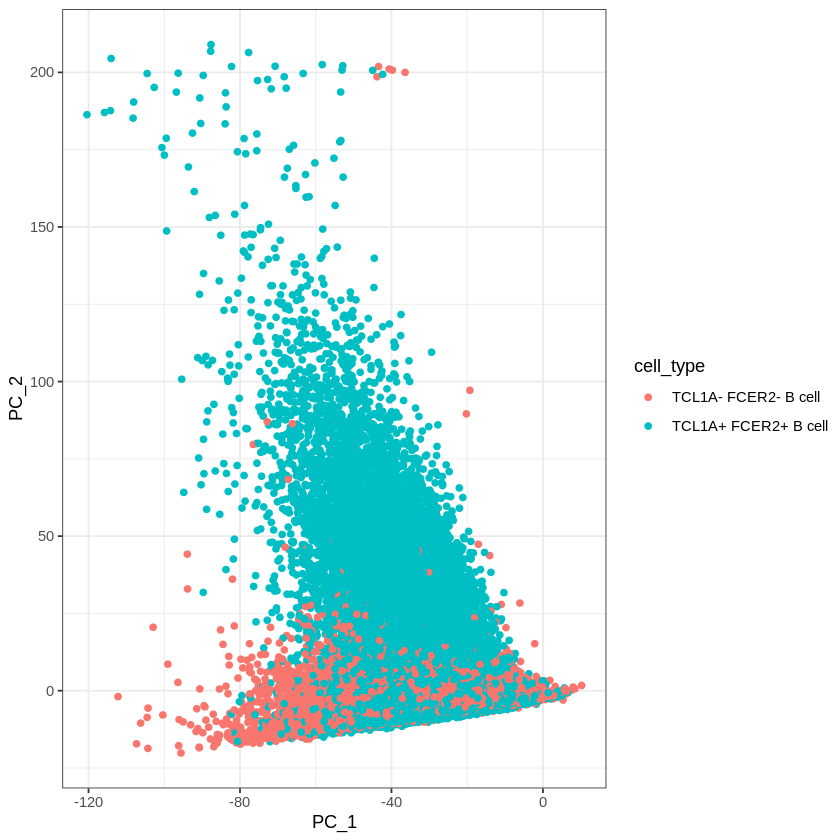

In [29]:
ggplot(df_to_plot, aes(x=PC_1, y = PC_2, colour = cell_type)) + geom_point() + theme_bw()

In [30]:
df_colours = read.csv(paste0(mydir,"celltype_colours.csv"), row.names=1)
head(df_colours)

,cell_type,colours
,<chr>,<chr>
1,CD4+ KLRB1- T cell,#882E72
2,CD4+ KLRB1+ T cell,#B178A6
3,CD4+ SOX4+ T cell,#D6C1DE
4,CD8+ GNLY+ NKG7+ T cell,#1965B0
5,CD8+ LTB+ T cell,#5289C7
6,CD8+ S100B+ T cell,#7BAFDE


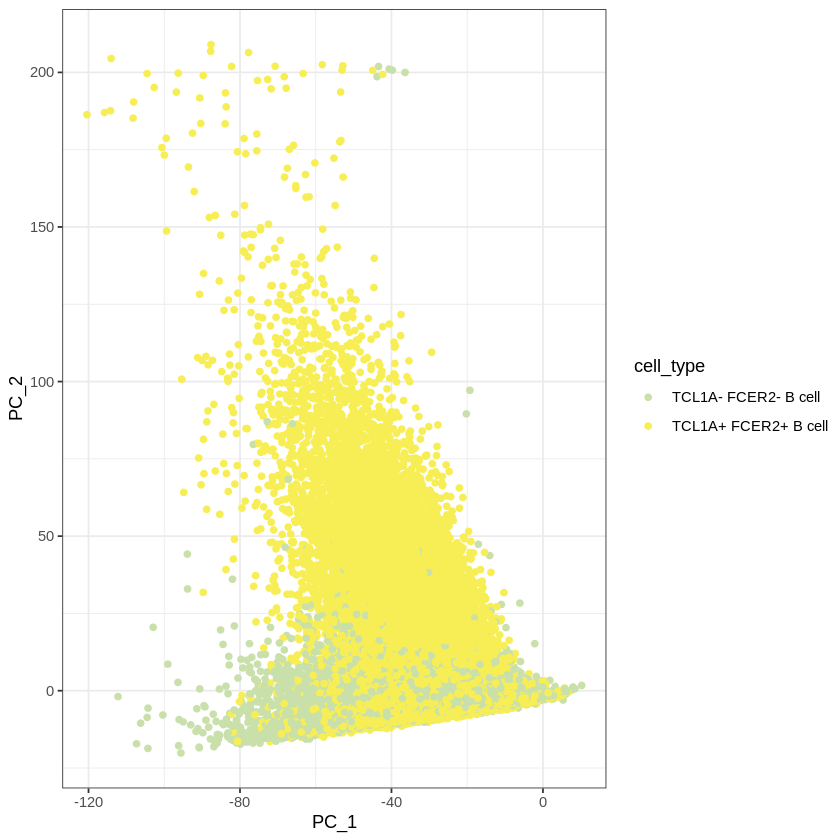

In [31]:
ggplot(df_to_plot, aes(x=PC_1, y = PC_2, colour = cell_type)) + geom_point() + theme_bw() +
    scale_colour_manual(values = df_colours[grep("B cell",df_colours$cell_type),]$colours) 

In [6]:
library(Seurat)

Attaching SeuratObject



In [11]:
# sce_B = RunUMAP(sce_B, reduction = "pca", dims = 1:10)
sce_B = RunUMAP(sce_B, reduction = "pca", dims = 1:5, umap.method = "uwot")

17:33:29 UMAP embedding parameters a = 0.9922 b = 1.112

17:33:29 Read 133716 rows and found 5 numeric columns

17:33:29 Using Annoy for neighbor search, n_neighbors = 30

17:33:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:33:44 Writing NN index file to temp file /tmp/RtmpDiMdM1/file1482822b39e

17:33:44 Searching Annoy index using 1 thread, search_k = 3000



ERROR: Error in annoy_search_parallel(X = X, k = k, ann = ann, search_k = search_k, : search_k/n_trees settings were unable to find 30 neighbors for all items.


In [ ]:
DimPlot(object = sce_B, reduction = 'umap')

In [ ]:
# saveRDS(sce_B, paste0(mydir,"Bcells_sce.rds"))

In [3]:
sce_B = readRDS(paste0(mydir,"Bcells_sce.rds"))

In [ ]:
umap_df = as.data.frame(Embeddings(sce_B, reduction = "umap"))
dim(umap_df)
head(umap_df)

In [ ]:
umap_df$cell = rownames(umap_df)
df$cell = rownames(df)
df_to_plot0 = inner_join(umap_df, df, by = "cell")

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6) 
ggplot(df_to_plot0, aes(x=UMAP_1, y = UMAP_2, colour = cell_type)) + geom_point() #+ theme_bw() +
#     scale_colour_manual(values = df_colours[grep("B cell",df_colours$cell_type),]$colours)

In [ ]:
# fig_dir = "/share/ScratchGeneral/anncuo/OneK1K/figures/"
# pdf(paste0(fig_dir,"Bcells_UMAP.pdf"), width=8, height=6)
# ggplot(df_to_plot0, aes(x=UMAP_1, y = UMAP_2, colour = cell_type)) + geom_point() + theme_bw() +
#     scale_colour_manual(values = df_colours[grep("B cell",df_colours$cell_type),]$colours)
# dev.off()

In [ ]:
# df_celltypes = read.csv(paste0(mydir,"celltype_names.csv"), row.names=1)
# df_celltypes

In [32]:
# C_filename = paste0(input_files_dir,"PCs_Bcells.csv")
C_filename = paste0(input_files_dir,"PCs_Bcells_noplasma.csv")
C_filename

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/PCs_Bcells_noplasma.csv"

In [33]:
write.csv(pca_df, C_filename)

In [ ]:
##################################################
##### feature-variant filter file (B-cells only)

In [34]:
## eQTL results
results_filename =  paste0(mydir,"OneK1K_eQTLs_Results_03022021.tsv")
eqtl_df = read.csv(results_filename, sep="\t")
head(eqtl_df)

,cell_type,GeneID,Gene_EnsemblID,rsID,Chromosome,Position,SNP_assessed_allele,eSNP_rank,rho_correlation_coefficient,S.statistics,pvalue,qvalue,FDR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B IN,RP11-298J20.3,ENSG00000226899,rs4962711,10,126644482,C,eSNP1,-0.473,232418782,8.653e-56,5.108e-50,2.164e-05
2,B IN,PPA1,ENSG00000180817,rs12355080,10,71963608,A,eSNP1,0.428,90338126,6.308e-45,1.646e-40,2.164e-05
3,B IN,GDI2,ENSG00000057608,rs3736461,10,5855403,C,eSNP1,-0.278,201715943,6.764e-19,6.078e-15,2.164e-05
4,B IN,OPTN,ENSG00000123240,rs57057378,10,13160035,A,eSNP1,-0.258,198494721,2.342e-16,2.032e-12,2.164e-05
5,B IN,MGMT,ENSG00000170430,rs12254582,10,131279791,G,eSNP1,-0.220,192526141,3.259e-12,2.150e-08,2.164e-05
6,B IN,VDAC2,ENSG00000165637,rs11543,10,76970613,C,eSNP1,-0.219,192405014,3.889e-12,2.546e-08,2.164e-05


In [35]:
Bcell_eqtls = eqtl_df[grep("B ",eqtl_df$cell_type),]
nrow(Bcell_eqtls)
head(Bcell_eqtls,2)

[1] 3264

,cell_type,GeneID,Gene_EnsemblID,rsID,Chromosome,Position,SNP_assessed_allele,eSNP_rank,rho_correlation_coefficient,S.statistics,pvalue,qvalue,FDR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B IN,RP11-298J20.3,ENSG00000226899,rs4962711,10,126644482,C,eSNP1,-0.473,232418782,8.653e-56,5.108e-50,2.164e-05
2,B IN,PPA1,ENSG00000180817,rs12355080,10,71963608,A,eSNP1,0.428,90338126,6.308e-45,1.646e-40,2.164e-05


In [36]:
unique(Bcell_eqtls$cell_type)

[1] "B IN"  "B Mem"

In [37]:
Bcell_eqtls$chrom = Bcell_eqtls$Chromosome
Bcell_eqtls$feature = Bcell_eqtls$GeneID
Bcell_eqtls$snp_id = paste0(Bcell_eqtls$chrom,":",Bcell_eqtls$Position)

In [38]:
fvf_df = Bcell_eqtls[,c("feature","snp_id","chrom")]
head(fvf_df)

,feature,snp_id,chrom
,<chr>,<chr>,<int>
1,RP11-298J20.3,10:126644482,10
2,PPA1,10:71963608,10
3,GDI2,10:5855403,10
4,OPTN,10:13160035,10
5,MGMT,10:131279791,10
6,VDAC2,10:76970613,10


In [ ]:
fvf_filename = paste0(input_files_dir,"fvf_Bcell_eqtls.csv")
fvf_filename

In [ ]:
write.csv(fvf_df, fvf_filename)